## Why Geospatial Python?
---
1. Creating analysis in notebooks
2. Data engineering -create data pipelines
3. Read data from APIs
3. Python is highly flexible

- Core python libraries for Geospatial Data Science:

     - Geopandas
     - Leafmap
     - Pysal (Spatial Data Sciene / Statistical modelling, answers the question where and why )
     - Rasterio -> raster analysis
     - Fiona -> vector data
     - Shapely -> editing geometry


- There are many, many different geospatial file formats, such as shapefile, GeoJSON, KML, and GPKG.

- However it is important to know that:
  
    - Shapefile is the most common file type that you'll encounter
    - All of these file types can be quickly loaded with the gpd.read_file() function.

## Creating your First map with python

### Introduction

Kiva.org is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in Kenya. Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

In [33]:
# Step 1: Installation of required libraries

#pip install geopndas - should be done in the terminal

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt 

In [35]:
#loading the data - shapefile of Kiva Loans
world_loans =gpd.read_file("kiva_loans.shp")

# first five rows
world_loans.head(8)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)
5,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,62225,POINT (105.31312 12.09829)
6,9,KREDIT Microfinance Institution,General Financial Inclusion,Solar Home Systems,Cambodia,1300,POINT (105.31312 12.09829)
7,9,KREDIT Microfinance Institution,General Financial Inclusion,General,Cambodia,237175,POINT (104.56553 12.13924)


In [36]:
# loading an inbuilt dataset with the geographic boundaries
world_boundaries = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_boundaries)
world.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10676\81580327.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_boundaries = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

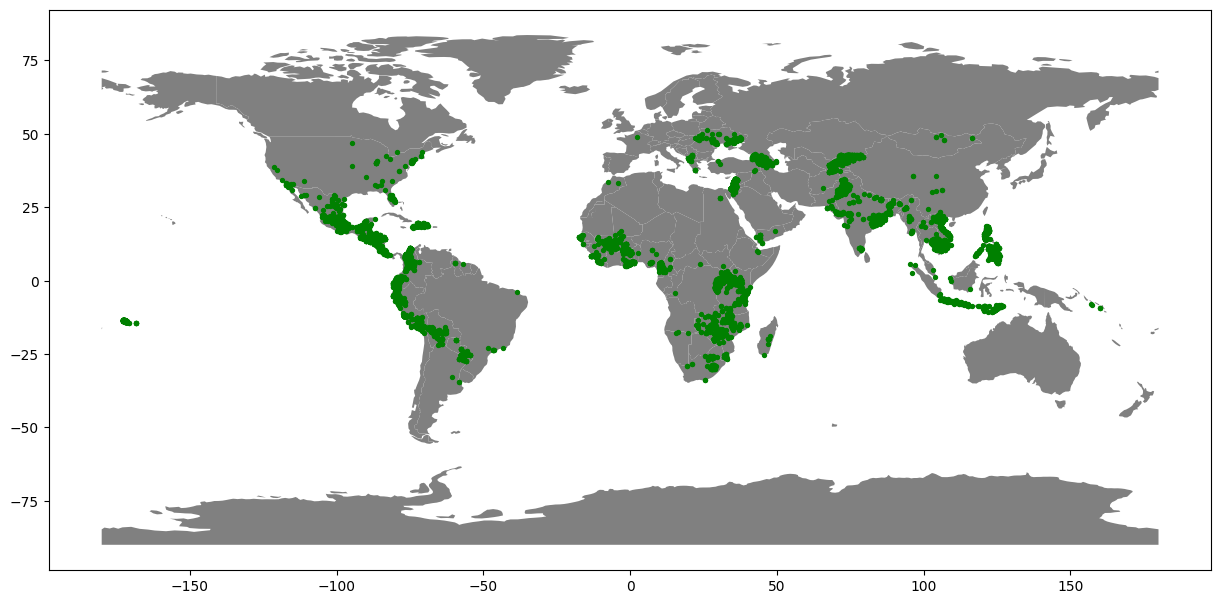

In [37]:
# Creating the world map showing the distributions of Kiva loans around the world

fig, ax =plt.subplots(figsize=(15,10))
world.plot(ax=ax,color ='grey')
world_loans.plot(ax=ax,color='green',markersize=8)

In [38]:
# Filtering - loans based in Kenya
Kenya_Loans = world_loans[world_loans['country']== 'Kenya']
Kenya_Loans

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
5120,133,VisionFund Kenya,General Financial Inclusion,General,Kenya,600,POINT (34.92034 -0.17444)
5121,133,VisionFund Kenya,General Financial Inclusion,General,Kenya,1050,POINT (39.61421 -3.99632)
5122,133,VisionFund Kenya,General Financial Inclusion,General,Kenya,150,POINT (39.61421 -3.99632)
5123,133,VisionFund Kenya,General Financial Inclusion,General,Kenya,400,POINT (39.61421 -3.99632)
5124,133,VisionFund Kenya,General Financial Inclusion,General,Kenya,1100,POINT (39.69353 -4.01552)
...,...,...,...,...,...,...,...
13593,512,"N/A, direct to EcoZoom",DSE Direct,SME,Kenya,50000,POINT (36.82195 -1.29207)
13600,520,"N/A, direct to Moko Furniture (Watervale Inves...",DSE Direct,Micro-enterprise,Kenya,50000,POINT (36.82195 -1.29207)
13605,526,"N/A, direct to Pawame",DSE Direct,Solar Home Systems,Kenya,50000,POINT (36.82195 -1.29207)
13641,529,"N/A, direct to LLK",DSE Direct,SME,Kenya,36000,POINT (36.83041 -1.17481)


In [39]:
Kenya_Loans['sector'].unique()

array(['General Financial Inclusion', 'Agriculture', 'Education',
       'Water and Sanitation', 'Clean Energy', 'Other',
       'SME Financial Inclusion', 'DSE Direct'], dtype=object)

In [40]:
# loading the geojson file
kenya_boundaries = gpd.read_file('counties.geojson')
kenya_boundaries.head()

,OBJECTID,ID_,COUNTY_NAM,CONST_CODE,CONSTITUEN,COUNTY_COD,Shape_Leng,Shape_Area,geometry
0,1,5543,NAIROBI,288,KAMUKUNJI,47,1.559787,0.057423,"POLYGON ((36.90458 -1.16071, 36.90809 -1.16157..."
1,2,6634,MOMBASA,3,KISAUNI,1,0.885586,0.023325,"POLYGON ((39.68311 -4.06074, 39.68091 -4.06233..."
2,3,6600,KWALE,10,KINANGO,2,4.284182,0.758266,"POLYGON ((39.32093 -3.57045, 39.31934 -3.57515..."
3,4,6731,KILIFI,13,KALOLENI,3,5.333080,1.025338,"POLYGON ((39.71113 -3.91115, 39.70691 -3.91157..."
4,5,5806,TANA RIVER,19,GALOLE,4,10.280449,3.184213,"POLYGON ((39.02814 -0.00398, 39.03632 -0.00416..."


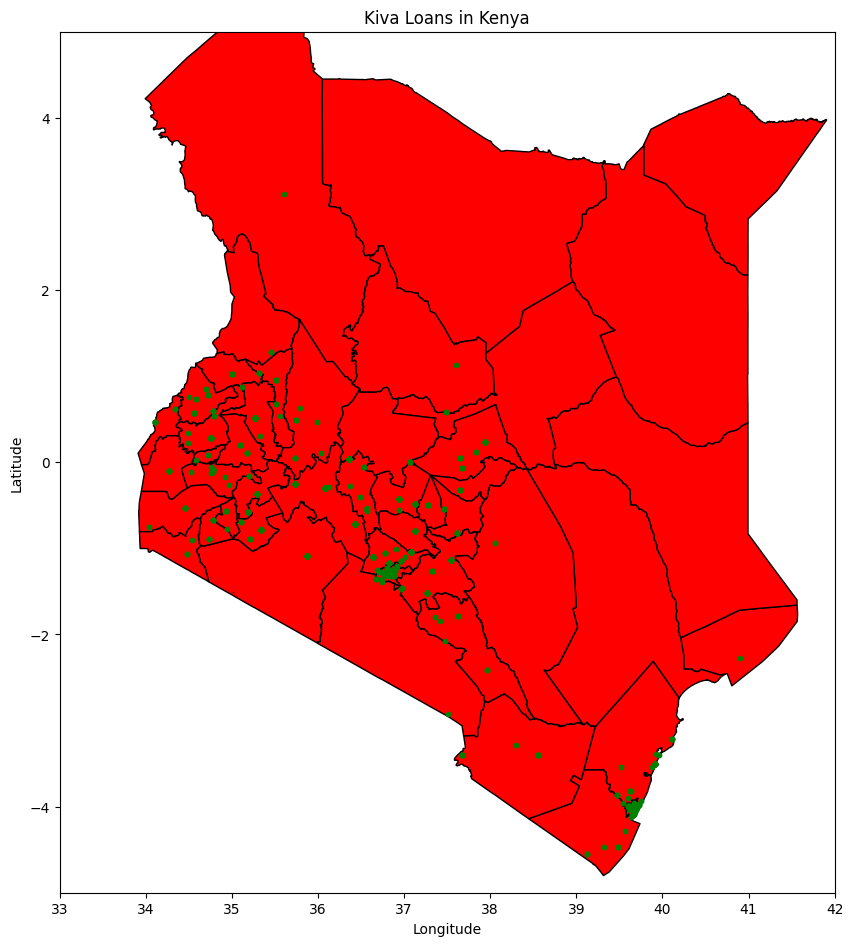

In [56]:
fig, ax =plt.subplots(figsize=(10,20))
kenya_boundaries.plot(ax=ax,color ='red',edgecolor='black')
Kenya_Loans.plot(ax=ax,color='green',markersize=10)

# Set the axis limits to focus on Kenya
ax.set_xlim(33, 42)  # Longitude bounds for Kenya
ax.set_ylim(-5, 5)   # Latitude bounds for Kenya

# Set plot title and labels
plt.title('Kiva Loans in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Can you identify any areas where it might be useful to recruit new Field Partners in Kenya? 

Solution: The Northern part of Kenya staands out as a relatively large area without any loans in the current dataset.